# Preliminaries

## Importing packages

In [1]:
import numpy as np

%load_ext autoreload
%autoreload 1
%matplotlib inline

import seaborn as sns
sns.set()
sns.set_style('whitegrid')
sns.set_context('notebook')

from thesis_EAfunc import *

# Define landscape

In [2]:
#Problem domain
x_min = -2.5
x_max = 2.5
y_min = -2.5
y_max = 2.5

domain = (x_min, x_max, y_min, y_max)

#Problem definition
def f(x, y):
    D = 2
    alpha = 1/8
    a = np.abs(x ** 2 + y ** 2 - D) ** (alpha * D)
    b = ( 0.5 * (x ** 2 + y ** 2) + (x + y) ) / D
        
    return (a + b + 0.5)

f(-1,-1)

0.0

In [5]:
#starting seed
np.random.seed(654321)

#Algorithm parameters
exp_n = 100
gen_n = 0
pop_s = 12
birthcounter = 0
par_s = 6
prog_s = 6
mut_p = 0.5
mut_s = 0.5
par_selection = 'Ranking'
crossover = 'None'
mutation = 'random_co_dis'
population_new='Ranking'

In [6]:
fitness_res = EA_exp(exp_n, f, domain, pop_s, par_s, prog_s, mut_p, mut_s, par_selection, crossover, mutation, population_new)

fitn_res_cols=['run', 'generation', 'fitness_min', 'fitness_max', 'fitness_mean']

fitness_res = pd.DataFrame(columns=fitn_res_cols)

for j in range(100):
    run_n = j
    birthcounter = 0

    population, generations, birthcounter, gen_n = EA_start(pop_s, domain, f, birthcounter)

    for i in range(40):
        birthcounter, progeny = EA_prog(population, par_s, prog_s, birthcounter, gen_n, mut_p, mut_s, domain, f, par_selection='Ranking', crossover='None', mutation='random_co_dis')
        generations = EA_prog_to_df(generations, progeny)
        gen_n, population, progeny = EA_new_population(population, progeny, gen_n, pop_s, f, method='Ranking')
        generations = EA_pop_to_df(generations, population)

    fitness = EA_fitn_summary(generations)
    fitness = fitness.reset_index()
    fitness.insert(0, 'run', run_n)
    fitness_res = fitness_res.append(fitness, ignore_index = True)

# Data visualization

## Results visualization

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f39d74c0c18>]],
      dtype=object)

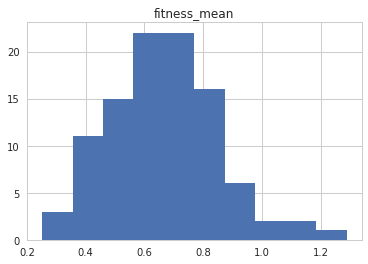

In [7]:
fitness_res[fitness_res['generation']==40].hist(column='fitness_mean')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f39d7441588>]],
      dtype=object)

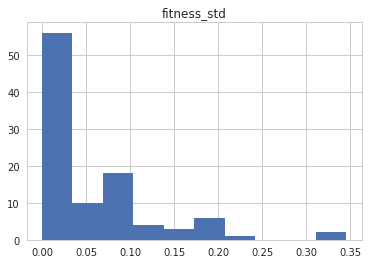

In [8]:
fitness_res[fitness_res['generation']==40].hist(column='fitness_std')

In [9]:
fitness_res

,fitness_max,fitness_mean,fitness_min,fitness_std,generation,run
0,5.389172,2.970253,1.400563,1.233395,0.0,0.0
1,1.887536,1.246876,0.272626,0.552972,1.0,0.0
2,1.851636,1.174357,0.272626,0.511931,2.0,0.0
3,1.438982,0.817283,0.272626,0.466974,3.0,0.0
4,1.318106,0.634539,0.272626,0.409184,4.0,0.0
5,1.445583,0.585421,0.272626,0.417458,5.0,0.0
6,1.263619,0.570257,0.272626,0.385451,6.0,0.0
7,1.252404,0.569322,0.272626,0.383626,7.0,0.0
8,1.053209,0.492982,0.272626,0.321447,8.0,0.0
9,1.053209,0.492982,0.272626,0.321447,9.0,0.0
